#Task4
 Analyze traffic accident data to identify patterns related to road conditions ,weather, and time of day. Visualize accident hotspots and contributing factors.

#Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load Dataset

In [2]:
df= pd.read_csv('/content/Road Accident Data.csv')
df

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Feb,Thursday,2022,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,...,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car
307969,201091NM01881,2/21/2022,Feb,Sunday,2022,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,...,1,1,Northern,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds,Car
307970,201091NM01935,2/23/2022,Feb,Tuesday,2022,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,...,1,3,Northern,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds,Car
307971,201091NM01964,2/23/2022,Feb,Tuesday,2022,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


#Understanding Dataset

In [3]:
df.head()

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [4]:
df.tail()

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
307968,201091NM01760,2/18/2022,Feb,Thursday,2022,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,...,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car
307969,201091NM01881,2/21/2022,Feb,Sunday,2022,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,...,1,1,Northern,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds,Car
307970,201091NM01935,2/23/2022,Feb,Tuesday,2022,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,...,1,3,Northern,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds,Car
307971,201091NM01964,2/23/2022,Feb,Tuesday,2022,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc
307972,201091NM02142,2/28/2022,Feb,Sunday,2022,Give way or uncontrolled,T or staggered junction,Serious,57.575210,Daylight,...,1,1,Northern,Wet or damp,Dual carriageway,60,15:45,Rural,Snowing no high winds,Car


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Month                       307973 non-null  object 
 3   Day_of_Week                 307973 non-null  object 
 4   Year                        307973 non-null  int64  
 5   Junction_Control            307973 non-null  object 
 6   Junction_Detail             307973 non-null  object 
 7   Accident_Severity           307973 non-null  object 
 8   Latitude                    307973 non-null  float64
 9   Light_Conditions            307973 non-null  object 
 10  Local_Authority_(District)  307973 non-null  object 
 11  Carriageway_Hazards         5424 non-null    object 
 12  Longitude                   307973 non-null  float64
 13  Number_of_Casu

In [6]:
df.shape

(307973, 23)

In [7]:
df.describe()

,Year,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,2021.468934,52.487005,-1.368884,1.356882,1.829063,38.866037
std,0.499035,1.339011,1.356092,0.815857,0.710477,14.032933
min,2021.000000,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,2021.000000,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,2021.000000,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,2022.000000,53.415517,-0.206810,1.000000,2.000000,50.000000
max,2022.000000,60.598055,1.759398,48.000000,32.000000,70.000000


#Exploratory Data Analysis

In [8]:
df.isnull().sum()

,0
Accident_Index,0
Accident Date,0
Month,0
Day_of_Week,0
Year,0
Junction_Control,0
Junction_Detail,0
Accident_Severity,0
Latitude,0
Light_Conditions,0


In [16]:
# Convert Time to hour
df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M", errors="coerce").dt.hour

In [17]:
# Clean categorical columns
for col in ["Weather_Conditions", "Road_Type", "Accident_Severity"]:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown").astype(str).str.strip()

In [18]:
df.isnull().sum()

,0
Accident_Index,0
Accident Date,0
Month,0
Day_of_Week,0
Year,0
Junction_Control,0
Junction_Detail,0
Accident_Severity,0
Latitude,0
Light_Conditions,0


In [13]:
df.duplicated().sum()

np.int64(1)

It means there are no duplicate rows in our dataset

#Visualization

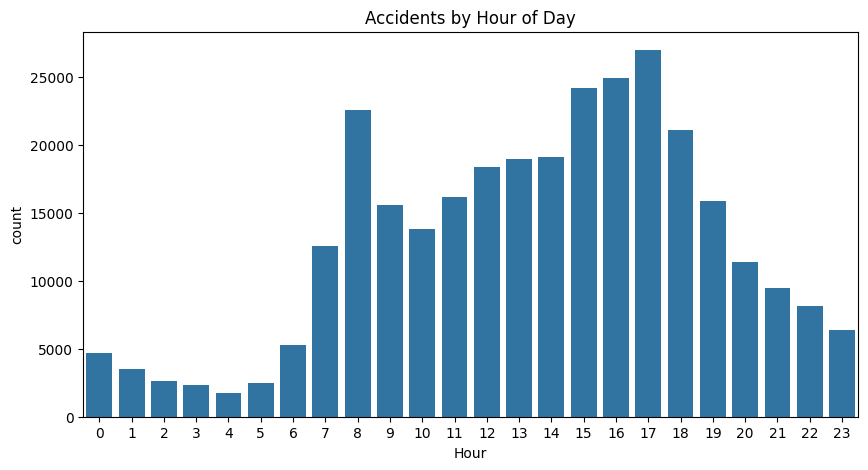

In [19]:
#Accidents by Hour of Day
plt.figure(figsize=(10,5))
sns.countplot(x="Hour", data=df, order=sorted(df["Hour"].dropna().unique()))
plt.title("Accidents by Hour of Day")
plt.savefig("accidents_by_hour.png")
plt.show()

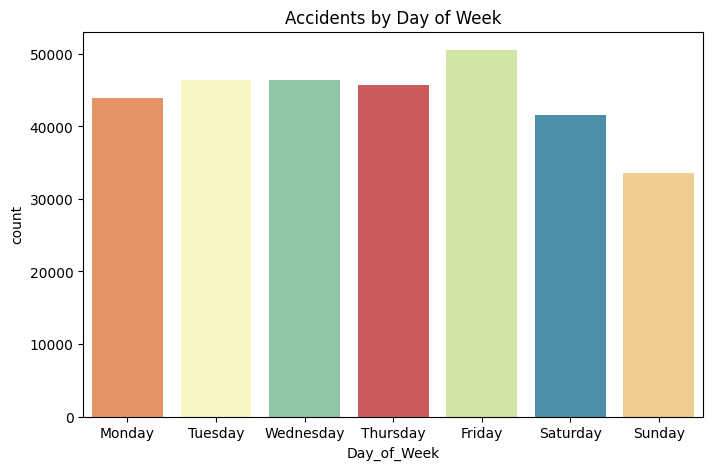

In [22]:
#Accidents by Day of Week (if column exists)
if "Day_of_Week" in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x="Day_of_Week", data=df,
                  order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='Spectral',hue='Day_of_Week')
    plt.title("Accidents by Day of Week")
    plt.savefig("accidents_by_day.png")
    plt.show()

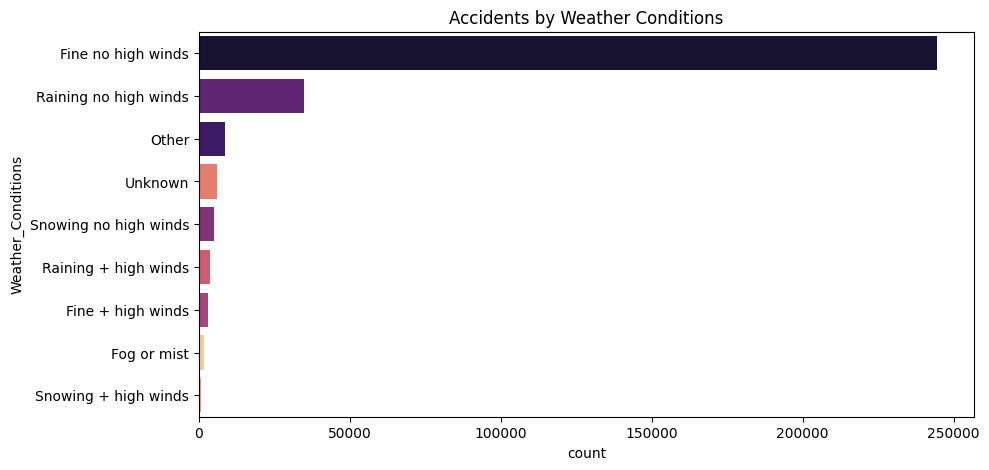

In [25]:
#Accidents by Weather
if "Weather_Conditions" in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(y="Weather_Conditions", data=df,
                  order=df["Weather_Conditions"].value_counts().index[:10],hue="Weather_Conditions",palette='magma')
    plt.title("Accidents by Weather Conditions")
    plt.savefig("accidents_by_weather.png")
    plt.show()

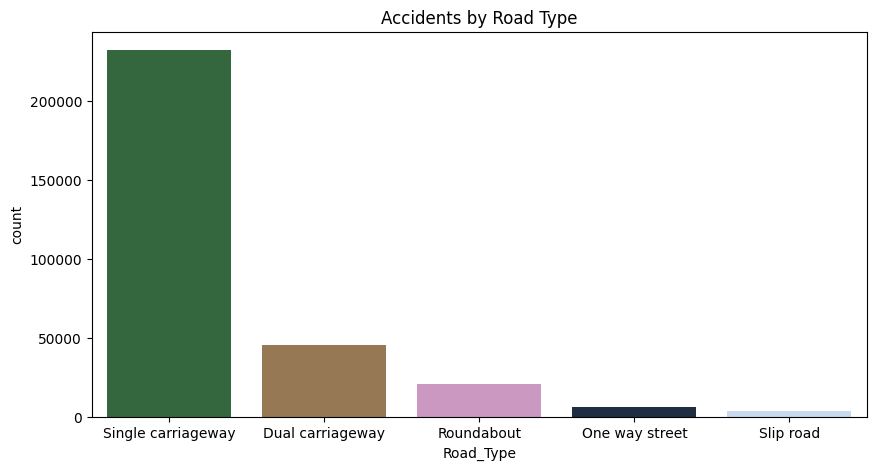

In [28]:
#Accidents by Road Type
if "Road_Type" in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x="Road_Type", data=df,
                  order=df["Road_Type"].value_counts().index[:10],palette='cubehelix',hue='Road_Type')
    plt.title("Accidents by Road Type")
    plt.savefig("accidents_by_roadtype.png")
    plt.show()

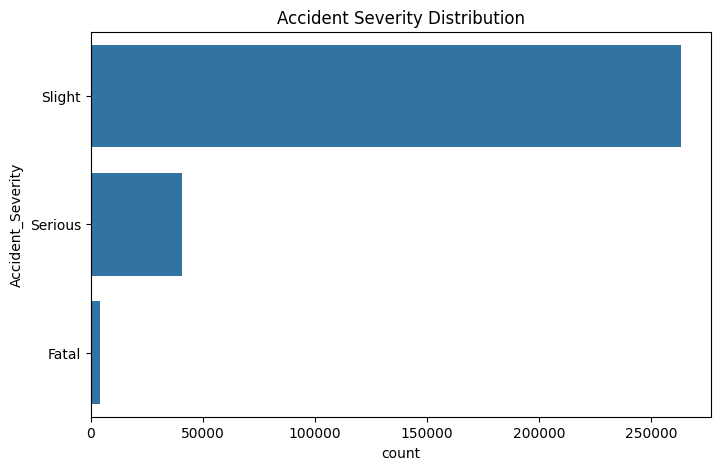

In [36]:
from typing import Any
#Severity Distribution
if "Accident_Severity" in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(y="Accident_Severity", data=df,order=df["Accident_Severity"].value_counts().index)
    plt.title("Accident Severity Distribution")
    plt.savefig("accident_severity.png")
    plt.show()

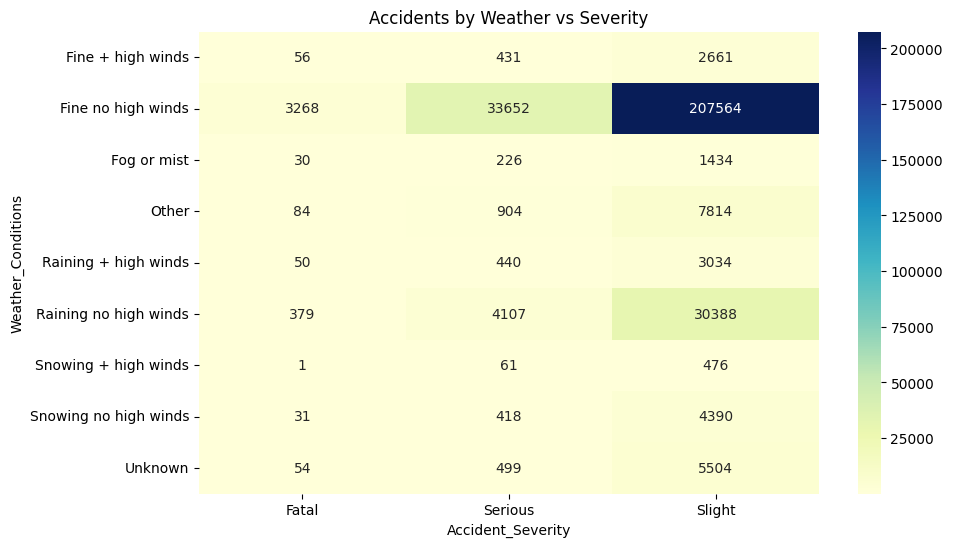

In [32]:
cross_tab = pd.crosstab(df["Weather_Conditions"], df["Accident_Severity"])

plt.figure(figsize=(10,6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Accidents by Weather vs Severity")
plt.savefig("weather_vs_severity_heatmap.png")
plt.show()

In [37]:
#Save Cleaned Dataset
df.to_csv("cleaned_road_accidents.csv", index=False)
print("Cleaned dataset saved.")

Cleaned dataset saved.
